# All imports

In [16]:
import pandas as pd 
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as ng
import sklearn.linear_model as lm

import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", color_codes=True)

# Logical Prediction

In [17]:
dataset = pd.read_csv("train.csv")
X = dataset.loc[:,["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]]
y = dataset.loc[:,["Survived"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [18]:
Avg_run=30
score = []

for i in range(Avg_run):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y)
    prediction = []
    for passenger_index, passenger in X_train.iterrows():
        if passenger['Sex'] == 'female' or (passenger['Pclass'] == 1 and passenger['Age'] < 18) or (passenger['Pclass'] == 2 and passenger['Age'] < 15):
            prediction.append(1)
        else:
            prediction.append(0)
    l=0
    acc=0
    for index,p in y_train.iterrows():
        if y_train.loc[index,"Survived"] == prediction[l]:
            acc+=1
        l+=1
    score.append(acc/len(y_train))
    
print("Average Accuracy: ",sum(score)/Avg_run)

Average Accuracy:  0.8014981273408243


# Easy and Convenient Model

In [19]:
easy_dataset = dataset.loc[:,["Survived","Pclass","Sex","Age","SibSp","Parch","Embarked"]]
easy_X = easy_dataset.loc[:,["Pclass","Sex","Age","SibSp","Parch","Embarked"]]
easy_y = easy_dataset.loc[:,["Survived"]]

# preparing numerical data
easy_X["Embarked"]=easy_X["Embarked"].replace({"S":1})
easy_X["Embarked"]=easy_X["Embarked"].replace({"C":2})
easy_X["Embarked"]=easy_X["Embarked"].replace({"Q":3})
easy_X["Sex"]=easy_X["Sex"].replace({"male":1})
easy_X["Sex"]=easy_X["Sex"].replace({"female":2})

dt_clf = tree.DecisionTreeClassifier()
lr_clf = lm.LogisticRegression()
knn_clf = ng.KNeighborsClassifier()
Avg_run = 30
dt_score =[]
lr_score = []
knn_score = []
for i in range(Avg_run):
    X_train,X_test,y_train,y_test = train_test_split(easy_X,easy_y,train_size=0.8,stratify=easy_y)
    X_train["Age"] = X_train["Age"].fillna(int(np.mean(X_train["Age"])))
    X_train["Embarked"] = X_train["Embarked"].fillna(1)
    X_test["Age"] = X_test["Age"].fillna(int(np.mean(X_test["Age"])))
    X_test["Embarked"] = X_test["Embarked"].fillna(1)
    dt_clf=dt_clf.fit(X_train,y_train)
    lr_clf=lr_clf.fit(X_train,y_train)
    knn_clf = knn_clf.fit(X_train,y_train)
    dt_score.append(dt_clf.score(X_test,y_test))
    lr_score.append(lr_clf.score(X_test,y_test))
    knn_score.append(knn_clf.score(X_test,y_test))
print("Logistic Regression: ",sum(lr_score)/Avg_run)
print("Decision Tree: ",sum(dt_score)/Avg_run)
print("KNN: ",sum(knn_score)/Avg_run)
    
    

Logistic Regression:  0.790875232775
Decision Tree:  0.78156424581
KNN:  0.751582867784


# Feature Engineering

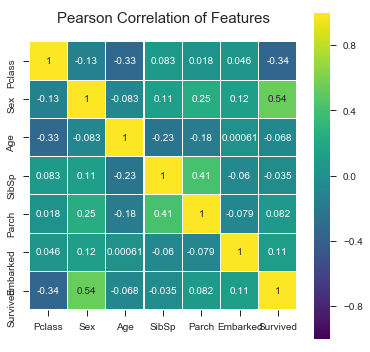

In [20]:
train_set = pd.concat([easy_X,easy_y["Survived"]],axis=1)
train_set["Age"] = train_set["Age"].fillna(int(np.mean(train_set["Age"])))
train_set["Embarked"] =train_set["Embarked"].fillna(1)
%matplotlib inline
plt.figure(figsize=(6,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_set.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)

In [21]:
from Age_prediction import trainClassifier
new_dataset = dataset.loc[:,["Pclass","Sex","Age","SibSp","Parch","Embarked","Survived"]]

new_dataset["Embarked"]=new_dataset["Embarked"].replace({"S":1})
new_dataset["Embarked"]=new_dataset["Embarked"].replace({"C":2})
new_dataset["Embarked"]=new_dataset["Embarked"].replace({"Q":3})
new_dataset["Sex"]=new_dataset["Sex"].replace({"male":1})
new_dataset["Sex"]=new_dataset["Sex"].replace({"female":2})

features = new_dataset.loc[:,["Pclass","Sex","Age","SibSp","Parch","Embarked"]]
labels = new_dataset.loc[:,["Survived"]]
features["Embarked"] = features["Embarked"].fillna(1)
age_clf = trainClassifier("train.csv")

for index,row in features.iterrows():
        arr = np.asarray(row)
        if pd.isnull(arr[2]):
            arr = np.delete(arr,2)
            features.loc[index,"Age"] = age_clf.predict(arr)
        else:
            if row["Age"] <= 16:
                features.loc[index,"Age"] = 1
            elif row["Age"]<=40:
                features.loc[index,"Age"] = 2
            elif row["Age"] <=55:
                features.loc[index,"Age"] = 3
            else:
                features.loc[index,"Age"] = 4
print(features.info())
#print(labels.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB
None


In [22]:
#familySize combination

features['FamilySize'] = features['SibSp'] + features['Parch'] + 1

features.drop(['SibSp','Parch'], axis=1, inplace=True)

print(features.head())

   Pclass  Sex  Age  Embarked  FamilySize
0       3    1  2.0       1.0           2
1       1    2  2.0       2.0           2
2       3    2  2.0       1.0           1
3       1    2  2.0       1.0           2
4       3    1  2.0       1.0           1


# Ensemble Learning

In [23]:
Avg_run = 30
score = []
dt=[]
knn=[]
lr=[]
dt_clf = tree.DecisionTreeClassifier()
knn_clf = ng.KNeighborsClassifier()
lr_clf = lm.LogisticRegression()

for i in range(Avg_run):
    X_train,X_test,y_train,y_test = train_test_split(features,labels,train_size = 0.8,stratify = labels)
    
    # normalizing
    #X_test["Age"]=(X_test["Age"]-np.mean(X_test["Age"]))/np.std(X_test["Age"])
    #X_test["FamilySize"]=(X_test["FamilySize"]-np.mean(X_test["FamilySize"]))/np.std(X_test["FamilySize"])
    #X_test["Pclass"]=(X_test["Pclass"]-np.mean(X_test["Pclass"]))/np.std(X_test["Pclass"])
    #X_test["Embarked"]=(X_test["Embarked"]-np.mean(X_test["Embarked"]))/np.std(X_test["Embarked"])
    #X_test["Sex"]=(X_test["Sex"]-np.mean(X_test["Sex"]))/np.std(X_test["Sex"])
    
    #X_train["Age"]=(X_train["Age"]-np.mean(X_train["Age"]))/np.std(X_train["Age"])
    #X_train["FamilySize"]=(X_train["FamilySize"]-np.mean(X_train["FamilySize"]))/np.std(X_train["FamilySize"])
    #X_train["Pclass"]=(X_train["Pclass"]-np.mean(X_train["Pclass"]))/np.std(X_train["Pclass"])
    #X_train["Embarked"]=(X_train["Embarked"]-np.mean(X_train["Embarked"]))/np.std(X_train["Embarked"])
    #X_train["Sex"]=(X_train["Sex"]-np.mean(X_train["Sex"]))/np.std(X_train["Sex"])
    #-----------------------------------------------------------------------------------
    dt_clf = dt_clf.fit(X_train,y_train)
    knn_clf = knn_clf.fit(X_train,y_train)
    lr_clf = lr_clf.fit(X_train,y_train)
    
    dt.append(dt_clf.score(X_test,y_test))
    knn.append(knn_clf.score(X_test,y_test))
    lr.append(lr_clf.score(X_test,y_test))
    
    predicted = []
    for index,row in X_test.iterrows():
        d=dt_clf.predict(row)
        kn=knn_clf.predict(row)
        l=lr_clf.predict(row)
        if d==0:
            if kn==0 or l==0:
                predicted.append(0)
            else:
                predicted.append(1)
        else:
            if kn==1 or l==1:
                predicted.append(1)
            else:
                predicted.append(0)
    #print(predicted)
    z=0
    a=0
    for index,ro in y_test.iterrows():
        if predicted[z]==ro["Survived"]:
            a+=1
        z+=1
    score.append(a/z)

print(type(y_test))
print("Average Accuracy of DT: ",sum(dt)/Avg_run)
print("Average Accuracy of KNN: ",sum(knn)/Avg_run)
print("Average Accuracy of LR: ",sum(lr)/Avg_run)
print("Average Accuracy of Ensemble Learning: ",sum(score)/Avg_run)

<class 'pandas.core.frame.DataFrame'>
Average Accuracy of DT:  0.806517690875
Average Accuracy of KNN:  0.790689013035
Average Accuracy of LR:  0.794599627561
Average Accuracy of Ensemble Learning:  0.8063314711359404


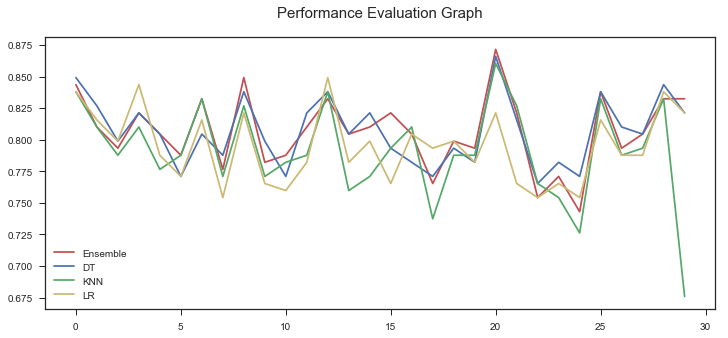

In [24]:
x_co = range(Avg_run)
plt.figure(figsize=(12,5))
plt.title('Performance Evaluation Graph', y=1.05, size=15)
plt.plot(x_co,score,"r",x_co,dt,"b",x_co,knn,"g",x_co,lr,"y")
plt.legend(["Ensemble","DT","KNN","LR"])
plt.show()

# Learning Curve

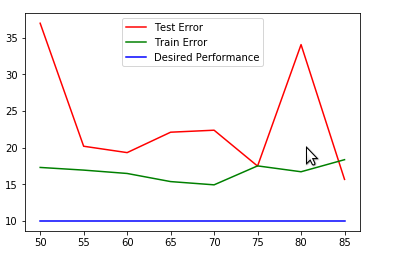

In [25]:
from IPython.display import Image
Image("LearningCurve.png")

# Other approach with large feature set

In [26]:
new_dataset = pd.read_csv("train.csv")
new_dataset = new_dataset.drop(["Name", "Ticket", "Cabin","Fare"], axis=1)
#new_dataset["Age"] = new_dataset["Age"].fillna(int(np.mean(new_dataset["Age"])))

age_clf = trainClassifier("train.csv")

# categorizing age 
for index,row in new_dataset.iterrows():
    arr = np.asarray(row)
    if pd.isnull(arr[2]):
        arr = np.delete(arr,2)
        features.loc[index,"Age"] = age_clf.predict(arr)
    else:
        if row["Age"] <= 16:
            new_dataset.loc[index,"Age"] = 1
        elif row["Age"]<=40:
            new_dataset.loc[index,"Age"] = 2
        elif row["Age"] <=55:
            new_dataset.loc[index,"Age"] = 3
        else:
            new_dataset.loc[index,"Age"] = 4

new_dataset["Embarked"] = new_dataset["Embarked"].fillna("S")

print(new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB
None


In [27]:
# dividing the features using one hot encoding
encode_data = pd.get_dummies(new_dataset)
print(encode_data.head())

   PassengerId  Survived  Pclass  Age  SibSp  Parch  Sex_female  Sex_male  \
0            1         0       3  2.0      1      0           0         1   
1            2         1       1  2.0      1      0           1         0   
2            3         1       3  2.0      0      0           1         0   
3            4         1       1  2.0      1      0           1         0   
4            5         0       3  2.0      0      0           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


In [28]:
new_features = encode_data.loc[:,["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]
new_labels = encode_data.loc[:,["Survived"]]

In [29]:
Avg_run = 30
score = []
dt=[]
knn=[]
lr=[]
dt_clf = tree.DecisionTreeClassifier()
knn_clf = ng.KNeighborsClassifier()
lr_clf = lm.LogisticRegression()

for i in range(Avg_run):
    X_train,X_test,y_train,y_test = train_test_split(new_features,new_labels,train_size = 0.8,stratify = new_labels)
    
    # normalizing
    #X_test["Age"]=(X_test["Age"]-np.mean(X_test["Age"]))/np.std(X_test["Age"])
    #X_test["Fare"]=(X_test["Fare"]-np.mean(X_test["Fare"]))/np.std(X_test["Fare"])
    
    
    #X_train["Age"]=(X_train["Age"]-np.mean(X_train["Age"]))/np.std(X_train["Age"])
    #X_train["Fare"]=(X_train["Fare"]-np.mean(X_train["Fare"]))/np.std(X_train["Fare"])
    
    #-----------------------------------------------------------------------------------
    dt_clf = dt_clf.fit(X_train,y_train)
    knn_clf = knn_clf.fit(X_train,y_train)
    lr_clf = lr_clf.fit(X_train,y_train)
    
    dt.append(dt_clf.score(X_test,y_test))
    knn.append(knn_clf.score(X_test,y_test))
    lr.append(lr_clf.score(X_test,y_test))
    
    predicted = []
    for index,row in X_test.iterrows():
        d=dt_clf.predict(row)
        kn=knn_clf.predict(row)
        l=lr_clf.predict(row)
        if d==0:
            if kn==0 or l==0:
                predicted.append(0)
            else:
                predicted.append(1)
        else:
            if kn==1 or l==1:
                predicted.append(1)
            else:
                predicted.append(0)
    #print(predicted)
    z=0
    a=0
    for index,ro in y_test.iterrows():
        if predicted[z]==ro["Survived"]:
            a+=1
        z+=1
    score.append(a/z)
    
print("Average Accuracy of DT: ",sum(dt)/Avg_run)
print("Average Accuracy of KNN: ",sum(knn)/Avg_run)
print("Average Accuracy of LR: ",sum(lr)/Avg_run)
print("Average Accuracy of Ensemble Learning: ",sum(score)/Avg_run)

Average Accuracy of DT:  0.796834264432
Average Accuracy of KNN:  0.805027932961
Average Accuracy of LR:  0.796461824953
Average Accuracy of Ensemble Learning:  0.8059590316573555


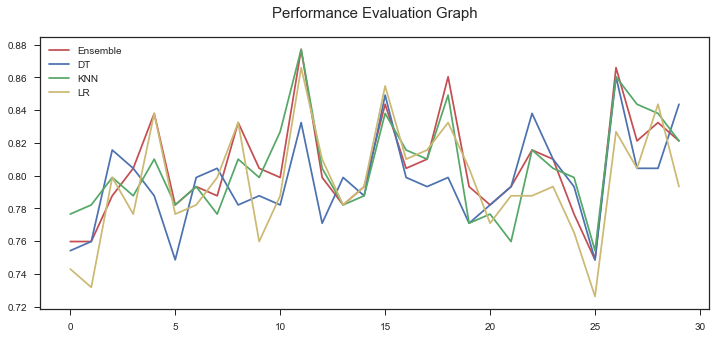

In [30]:
x_co = range(Avg_run)
plt.figure(figsize=(12,5))
plt.title('Performance Evaluation Graph', y=1.05, size=15)
plt.plot(x_co,score,"r",x_co,dt,"b",x_co,knn,"g",x_co,lr,"y")
plt.legend(["Ensemble","DT","KNN","LR"])
plt.show()

# Conclusion

# Resources